In [1]:
import os
os.chdir("../../scVI/")
os.getcwd()
save_path = '../CSF/Notebooks/'

import pickle
import numpy as np
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
import matplotlib.pyplot as plt

In [4]:
save_path = '../CSF/Notebooks/'
with open(save_path + 'dataset/all_datasets.pkl', 'rb') as f:
    gene_dataset = pickle.load(f)


In [272]:
scaling_factor = gene_dataset.X.mean(axis=1)
norm_X = gene_dataset.X/scaling_factor.reshape(len(scaling_factor), 1)

In [5]:
latent_u = np.load(save_path + 'UMAP/all_dataset.umap.npy')
celllabels = np.load(save_path + 'meta/celllabels.npy')
celltype, labels = np.unique(celllabels, return_inverse=True)
isMS = np.load(save_path+'meta/isMS.npy')
isCSF = np.load(save_path+'meta/isCSF.npy')
validclusters = (celllabels!='Mono Doublet') & \
(celllabels!='contamination1') & \
(celllabels!='doublet') & \
(celllabels!='B cell doublets') & \
(celllabels!='RBC')

In [340]:
genenames = list(gene_dataset.gene_names)

In [341]:
[x for x in genenames if x.startswith('IGHD')]

['IGHD']

In [342]:
[x for x in genenames if x.startswith('IGHA')]

['IGHA2', 'IGHA1']

In [343]:
[x for x in genenames if x.startswith('IGHG')]

['IGHG4', 'IGHG2', 'IGHGP', 'IGHG1', 'IGHG3']

In [344]:
[x for x in genenames if x.startswith('IGHM')]

['IGHMBP2', 'IGHM']

In [345]:
IGHD = [genenames.index(x) for x in genenames if x=='IGHD']
IGHDexprs = np.asarray(norm_X[:,IGHD]).ravel()

IGHA = [genenames.index(x)  for x in genenames if x in ['IGHA1','IGHA2']]
IGHAexprs = np.asarray(norm_X[:,IGHA]).mean(axis=1).ravel()

IGHG = [genenames.index(x)  for x in genenames if  x in ['IGHG1','IGHG2','IGHG3','IGHG4']]
IGHGexprs = np.asarray(norm_X[:,IGHG]).mean(axis=1).ravel()

IGHM = [genenames.index(x)  for x in genenames if x=='IGHM']
IGHMexprs = np.asarray(norm_X[:,IGHM]).mean(axis=1).ravel()


In [346]:
IGHexprs = [IGHDexprs,IGHAexprs,IGHGexprs,IGHMexprs]
IGHnames = ['IGHD','IGHA','IGHG','IGHM']

In [347]:
IGHmax = np.asarray([np.argmax(x) for x in np.asarray(IGHexprs).T])

In [348]:
subset = (celllabels=='B1')|(celllabels=='B2')#|(celllabels=='plasma')

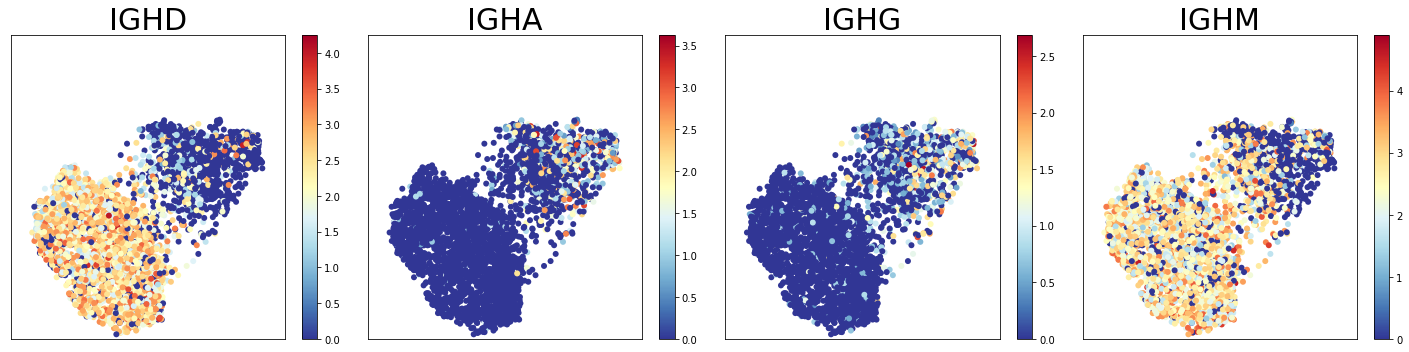

In [349]:
fig, ax = plt.subplots(figsize=(20, 5))
for i,x in enumerate(IGHexprs):
    ax = plt.subplot(1,4,i+1)
    im = ax.scatter(latent_u[subset, 0], latent_u[subset, 1],c=np.log(1+x[subset]),
                cmap='RdYlBu_r',edgecolors='none')
    fig.colorbar(im,  orientation='vertical')
    plt.title(IGHnames[i],fontsize=30)
    plt.xlim(5,10)
    plt.ylim(-18,-12)
    ax.yaxis.set_major_locator(plt.NullLocator())
    ax.xaxis.set_major_locator(plt.NullLocator())

plt.tight_layout()

plt.savefig('/data/yosef2/users/chenling/CSF/Notebooks/figures/SupFigure6/Bcell.featureplot.pdf')

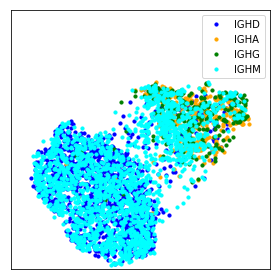

In [350]:
colors =['blue','orange','green','cyan']
plt.figure(figsize=(4, 4))
for i in range(4):
    plt.scatter(latent_u[subset &(IGHmax==i), 0], latent_u[subset & (IGHmax==i),1],
                color=colors[i],label=IGHnames[i],s=10)

plt.xlim(5,10)
plt.ylim(-18,-12)
plt.legend()
plt.xticks([])
plt.yticks([])
plt.tight_layout()

plt.savefig('/data/yosef2/users/chenling/CSF/Notebooks/figures/SupFigure6/Bcell.IGHmax.pdf')

In [351]:
IGHmax = np.asarray([np.argmax(x[:3]) for x in np.asarray(IGHexprs).T])

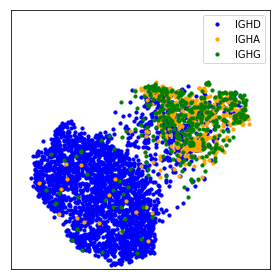

In [352]:
colors =['blue','orange','green']
plt.figure(figsize=(4, 4))
for i in range(3):
    plt.scatter(latent_u[subset &(IGHmax==i), 0], latent_u[subset & (IGHmax==i),1],
                color=colors[i],label=IGHnames[i],s=10)

plt.xlim(5,10)
plt.ylim(-18,-12)
plt.legend()
plt.xticks([])
plt.yticks([])
plt.tight_layout()

plt.savefig('/data/yosef2/users/chenling/CSF/Notebooks/figures/SupFigure6/Bcell.IGHmax.noIGM.pdf')

In [353]:
subset = (celllabels=='plasma')

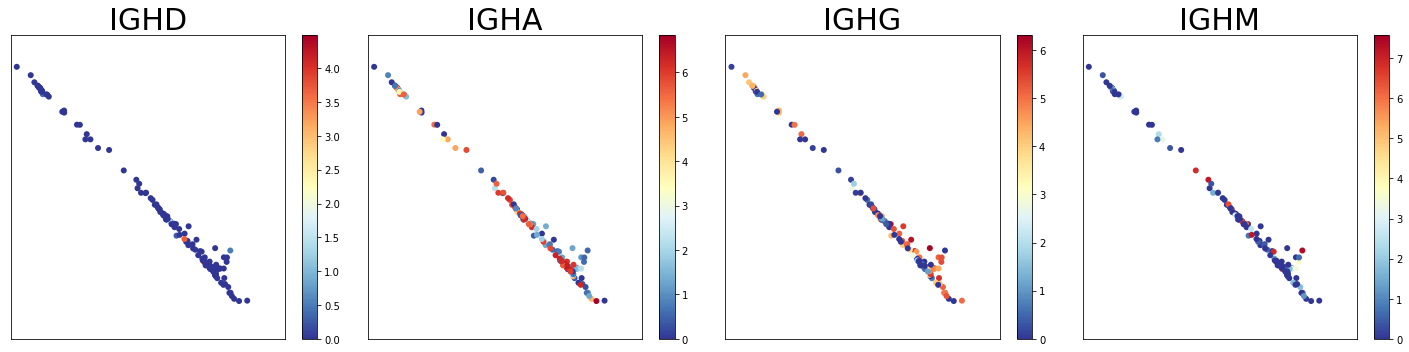

In [354]:
fig, ax = plt.subplots(figsize=(20, 5))
for i,x in enumerate(IGHexprs):
    ax = plt.subplot(1,4,i+1)
    im = ax.scatter(latent_u[subset, 0], latent_u[subset, 1],c=np.log(1+x[subset]),
                cmap='RdYlBu_r',edgecolors='none')
    fig.colorbar(im,  orientation='vertical')
    plt.title(IGHnames[i],fontsize=30)
    plt.xlim(14.95,15.5)
    plt.ylim(3.05,3.55)
    ax.yaxis.set_major_locator(plt.NullLocator())
    ax.xaxis.set_major_locator(plt.NullLocator())

plt.tight_layout()

plt.savefig('/data/yosef2/users/chenling/CSF/Notebooks/figures/SupFigure6/plasma.featureplot.pdf')

4
66
72
0


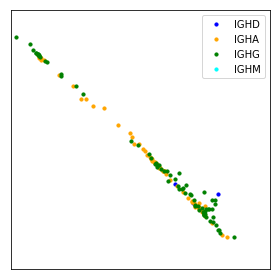

In [355]:
colors =['blue','orange','green','cyan']
plt.figure(figsize=(4, 4))
for i in range(4):
    idx=subset&(IGHmax==i)
    print(np.sum(idx))
    plt.scatter(latent_u[idx, 0], latent_u[idx,1],
                color=colors[i],label=IGHnames[i],s=10)

plt.legend()
plt.xlim(14.95,15.5)
plt.ylim(3.05,3.55)
plt.xticks([])
plt.yticks([])
plt.tight_layout()

plt.savefig('/data/yosef2/users/chenling/CSF/Notebooks/figures/SupFigure6/plasma.IGHmax.pdf')

In [359]:
print([x for x in genenames if x in ['IGHA2', 'IGHG4', 'IGHG2',  'IGHA1', 'IGHG1', 'IGHG3','IGHG4', 'IGHD', 'IGHM']])

['IGHA2', 'IGHG4', 'IGHG2', 'IGHA1', 'IGHG1', 'IGHG3', 'IGHD', 'IGHM']


In [360]:
print([x for x in genenames if x=='IGKC'])

['IGKC']


In [361]:
print([x for x in genenames if x in ['IGLC2', 'IGLC3', 'IGLC5', 'IGLC6', 'IGLC7']])

['IGLC2', 'IGLC3', 'IGLC5', 'IGLC6', 'IGLC7']


In [362]:
IGH = [genenames.index(x) for x in genenames if x in ['IGHA2', 'IGHG4', 'IGHG2',  'IGHA1', 'IGHG1', 'IGHG3','IGHG4', 'IGHD', 'IGHM']]
IGHexprs = np.asarray(norm_X[:,IGH]).mean(axis=1).ravel()

IGL = [genenames.index(x)  for x in genenames if x in ['IGLC2', 'IGLC3', 'IGLC5', 'IGLC6', 'IGLC7']]
IGLexprs = np.asarray(norm_X[:,IGL]).mean(axis=1).ravel()

IGK = [genenames.index(x)  for x in genenames if x=='IGKC']
IGKexprs = np.asarray(norm_X[:,IGK]).mean(axis=1).ravel()

IGexprs = [IGHexprs,IGLexprs,IGKexprs]
IGnames = ['IGH','IGL','IGK']

IGmax = np.asarray([np.argmax(x) for x in np.asarray(IGexprs).T])

/data/yosef2/users/chenling/miniconda3/envs/pytorch/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


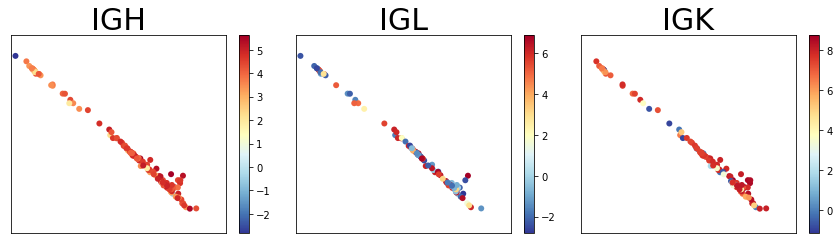

In [363]:
fig, ax = plt.subplots(figsize=(12, 3.5))
for i,x in enumerate(IGexprs):
    ax = plt.subplot(1,3,i+1)
    im = ax.scatter(latent_u[subset, 0], latent_u[subset, 1],c=np.log(x[subset]),
                cmap='RdYlBu_r',edgecolors='none')
    fig.colorbar(im,  orientation='vertical')
    plt.title(IGnames[i],fontsize=30)
    plt.xlim(14.95,15.5)
    plt.ylim(3.05,3.55)
    ax.yaxis.set_major_locator(plt.NullLocator())
    ax.xaxis.set_major_locator(plt.NullLocator())
plt.tight_layout()

plt.savefig('/data/yosef2/users/chenling/CSF/Notebooks/figures/SupFigure6/plasma.IGHIGL_featureplot.pdf')

6
42
94


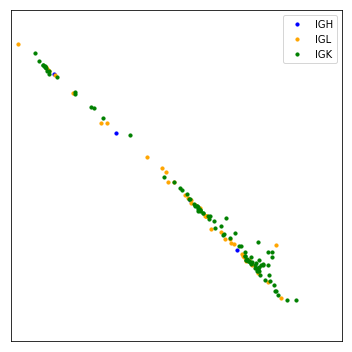

In [364]:
colors =['blue','orange','green']
plt.figure(figsize=(5, 5))
for i in range(3):
    idx=subset&(IGmax==i)
    print(np.sum(idx))
    plt.scatter(latent_u[idx, 0], latent_u[idx,1],
                color=colors[i],label=IGnames[i],s=10)

plt.legend()
plt.xlim(14.95,15.5)
plt.ylim(3.05,3.55)
plt.xticks([])
plt.yticks([])
plt.tight_layout()

plt.savefig('/data/yosef2/users/chenling/CSF/Notebooks/figures/SupFigure6/plasma.IGmax.pdf')

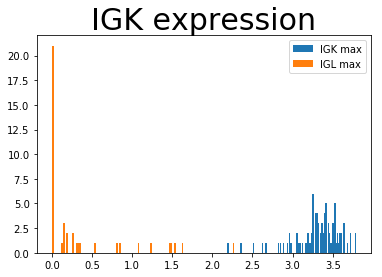

In [380]:
_ = plt.hist(np.log10(1+IGKexprs[subset & (IGmax==2)]),100,alpha=1,label='IGK max')
_ = plt.hist(np.log10(1+IGKexprs[subset & (IGmax==1)]),100,alpha=1,label='IGL max')
plt.title('IGK expression',fontsize=30)
plt.legend()

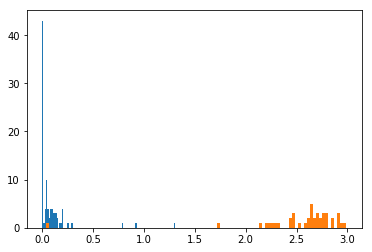

In [378]:
_ = plt.hist(np.log10(1+IGLexprs[subset & (IGmax==2)]),100)
_ = plt.hist(np.log10(1+IGLexprs[subset & (IGmax==1)]),100)


In [372]:
np.mean((IGmax==2)[subset & isCSF]) / np.mean((IGmax==1)[subset & isCSF])

2.75

In [373]:
np.mean((IGmax==2)[subset & (isCSF==False)]) / np.mean((IGmax==1)[subset & (isCSF==False)])

1.9230769230769231